# Project 2: Data Import - Working with Web APIs and JSON (Movies Dataset)

## Importing Data from JSON files 

1. __Import__ the json files __blockbusters.json__, __blockbusters2.json__, __blockbusters3.json__ and load the datasets into Pandas DataFrames.


In [1]:
import pandas as pd
import json
df1=pd.read_json("blockbusters.json", orient='record')
df2=pd.read_json("blockbusters2.json", orient='columns')
df3=pd.read_json("blockbusters3.json", orient='split')


with open("blockbusters.json") as f:
    data = json.load(f)
df=pd.DataFrame(data)
df_flattened=pd.json_normalize(data=data, sep= "_")
df_flat_genres=pd.json_normalize(data = data, record_path = "genres", meta = ["title", "id"],
                  record_prefix = "genre_")
df_flat_genres

,genre_id,genre_name,title,id
0,12,Adventure,Avengers: Endgame,299534
1,878,Science Fiction,Avengers: Endgame,299534
2,28,Action,Avengers: Endgame,299534
3,28,Action,Avatar,19995
4,12,Adventure,Avatar,19995
5,14,Fantasy,Avatar,19995
6,878,Science Fiction,Avatar,19995
7,28,Action,Star Wars: The Force Awakens,140607
8,12,Adventure,Star Wars: The Force Awakens,140607
9,878,Science Fiction,Star Wars: The Force Awakens,140607


## Working with APIs and JSON (Part 1)

2. __Create an account__ on https://www.themoviedb.org/

3. Get your personal __API Key__

4. __API-Request__ (movie module): Load all available information for the movie with __movie id = 140607__ into a Pandas DataFrame. <br> See https://developers.themoviedb.org/3/movies/get-movie-details for more information

In [2]:
import requests
api_key  = "7539474c8eb5209f86f4475c17c59c86"
pd.options.display.max_columns = 30
movie_id=140607
movie_api = "https://api.themoviedb.org/3/movie/{}?api_key="
url = movie_api.format(movie_id) + api_key
r = requests.get(url)
data_raw = r.json()
data=pd.Series(data_raw).to_frame()
data

,0
adult,False
backdrop_path,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg
belongs_to_collection,"{'id': 10, 'name': 'Star Wars Collection', 'po..."
budget,245000000
genres,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '..."
homepage,http://www.starwars.com/films/star-wars-episod...
id,140607
imdb_id,tt2488496
origin_country,[US]
original_language,en


## Working with APIs and JSON (Part 2)

5. __API-Request__ (discover module): Load all movies with __release date between 2020-01-01 and 2020-02-29__ into a Pandas DataFrame. <br>
See https://www.themoviedb.org/documentation/api/discover and https://developers.themoviedb.org/3/discover/movie-discover for more information.

In [31]:
api_key  = "7539474c8eb5209f86f4475c17c59c86"
query="&primary_release_date.gte=2020-01-01&primary_release_date.lte=2020-02-29"
discover_api = "https://api.themoviedb.org/3/discover/movie?api_key="
url = discover_api + api_key + query
r = requests.get(url)
print(url)
data_raw = r.json()
pd.DataFrame(data_raw['results'])

https://api.themoviedb.org/3/discover/movie?api_key=7539474c8eb5209f86f4475c17c59c86&primary_release_date.gte=2020-01-01&primary_release_date.lte=2020-02-29


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/eAIHqfS3kXm7kZl4j7ZBfdegyEz.jpg,"[53, 28, 80]",38700,en,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,220.656,/y95lQLnuNKdPAzw9F9Ab8kJ80c3.jpg,2020-01-15,Bad Boys for Life,False,7.125,7815
1,False,/vLI1uQuvk3lUnTWER0bJ9RSRnKM.jpg,"[35, 18]",547012,en,Buffaloed,"Set in the underworld of debt-collecting, home...",171.162,/h37VMJAm4EhKC3k6I6K20VHaSQe.jpg,2020-02-14,Buffaloed,False,6.729,225
2,False,/tintsaQ0WLzZsTMkTiqtMB3rfc8.jpg,"[28, 80, 35]",522627,en,The Gentlemen,American expat Mickey Pearson has built a high...,74.124,/jtrhTYB7xSrJxR1vusu99nvnZ1g.jpg,2020-01-01,The Gentlemen,False,7.682,5540
3,False,/stmYfCUGd8Iy6kAMBr6AmWqx8Bq.jpg,"[28, 878, 35, 10751]",454626,en,Sonic the Hedgehog,"Powered with incredible speed, Sonic The Hedge...",65.331,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,2020-02-12,Sonic the Hedgehog,False,7.328,9273
4,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,"[28, 80]",495764,en,Birds of Prey (and the Fantabulous Emancipatio...,"Harley Quinn joins forces with a singer, an as...",64.213,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,2020-02-05,Birds of Prey (and the Fantabulous Emancipatio...,False,6.927,10014
5,False,/2cbUXan4QUY1QoVnhhunJqpKR8y.jpg,"[10751, 35, 14, 12]",448119,en,Dolittle,"After losing his wife seven years earlier, the...",59.870,/uoplwswBDy7gsOyrbGuKyPFoPCs.jpg,2020-01-02,Dolittle,False,6.615,3531
6,False,/kU5qE5b6ksL3osaqKCUlMS08Ays.jpg,"[18, 10749]",589049,en,The Photograph,When famed photographer Christina Eames dies u...,59.815,/cdqZqIcWt0Ne2Io2OA9iWqqMuCA.jpg,2020-02-14,The Photograph,False,6.453,201
7,False,/6mKAKhj8POVGqV1GsroS5mGIUe9.jpg,"[14, 28, 12]",666750,en,Dragonheart: Vengeance,"Lukas, a young farmer whose family is killed b...",46.886,/qs6gz6atyQcAvqC6qZaslOjliUG.jpg,2020-02-04,Dragonheart: Vengeance,False,6.900,301
8,False,/ww7eC3BqSbFsyE5H5qMde8WkxJ2.jpg,"[27, 878, 28, 12]",443791,en,Underwater,After an earthquake destroys their underwater ...,46.506,/gzlbb3yeVISpQ3REd3Ga1scWGTU.jpg,2020-01-08,Underwater,False,6.300,2997
9,False,/xFxk4vnirOtUxpOEWgA1MCRfy6J.jpg,"[10751, 16, 12, 35, 14]",508439,en,Onward,"In a suburban fantasy world, two teenage elf b...",45.863,/f4aul3FyD3jv3v4bul1IrkWZvzq.jpg,2020-02-29,Onward,False,7.695,5965


##  Importing and Saving the Movies Dataset (Best Practice)

6. __API-Request__ (movie module): Load all available information for the movies with movie id = [__299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513__] into a Pandas DataFrame and __save the dataset in a local json file__.

In [58]:
movies_ids= [299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]
api_key  = "7539474c8eb5209f86f4475c17c59c86"
movies=[]
for movie_id in movies_ids:
    movie_api = "https://api.themoviedb.org/3/movie/{}?api_key="
    url = movie_api.format(movie_id) + api_key
    r = requests.get(url)
    if r.status_code !=200:
        continue
    else:
        data_raw = r.json()
        movies.append(data_raw)
data=pd.DataFrame(movies)
#Save to a json file
data.to_json('movies_i_retrieved.json', orient='records')

#make sure the json file works
test_df=pd.read_json('movies_i_retrieved.json')
test_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,Avengers: Endgame,After the devastating events of Avengers: Infi...,226.983,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2800000000,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.253,24945
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",146.272,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.581,30917
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,81.252,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.281,18961
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,[US],en,Avengers: Infinity War,As the Avengers and their allies have continue...,263.597,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,An entire universe. Once and for all.,Avengers: Infinity War,False,8.246,28960
4,False,/5YLNDnkO0cZZwog2StyR3YmmBPh.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,[US],en,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,124.035,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,False,7.905,24700
5,False,/dF6FjTZzRTENfB4R17HDN20jLT2.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.jurassicworld.com/,135397,tt0369610,[US],en,Jurassic World,Twenty-two years after the events of Jurassic ...,76.685,/A0LZHXUzo5C60Oahvt7VxvwuzHw.jpg,"[{'id': 56, 'logo_path': '/cEaxANEisCqeEoRvODv...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671537444,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The park is open.,Jurassic World,False,6.688,19981
6,False,/1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg,"{'id': 762512, 'name': 'The Lion King (Reboot)...",260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",https://movies.disney.com/the-lion-king-2019,420818,tt6105098,[US],en,The Lion King

# Playing with the complete list of movies (daily exports from TMDB)

In [5]:
import pandas as pd
import json
def fix_json_file(input_file, output_file):
  with open(input_file, "r", encoding='utf-8') as f_in, open(output_file, "w", encoding='utf-8') as f_out:
    data = f_in.read()
    fixed_data = "}, ".join(data.strip().split("}")).strip()
    fixed_data = fixed_data[:-1]
    fixed_data='['+fixed_data+']'
    f_out.write(fixed_data)

# Example usage
fix_json_file("movie_ids_06_03_2024.json", "corrected_file.json")

with open("corrected_file.json", encoding='utf-8') as f:
    data = json.load(f)
data
df=pd.DataFrame(data)
df

,adult,id,original_title,popularity,video
0,False,3924,Blondie,3.058,False
1,False,6124,Der Mann ohne Namen,1.248,False
2,False,8773,L'Amour à vingt ans,5.800,False
3,False,25449,New World Disorder 9: Never Enough,0.480,False
4,False,31975,Sesame Street: Elmo Loves You!,0.003,True
...,...,...,...,...,...
936896,False,1299311,Blur Blue,0.000,False
936897,False,1299312,Worm Regards and Other Stories,0.000,False
936898,False,1299313,2467 km – Eine Reise bis ins Schwarze Meer,0.000,False
936899,False,1299314,후배부부와 교환섹스 2,0.000,False


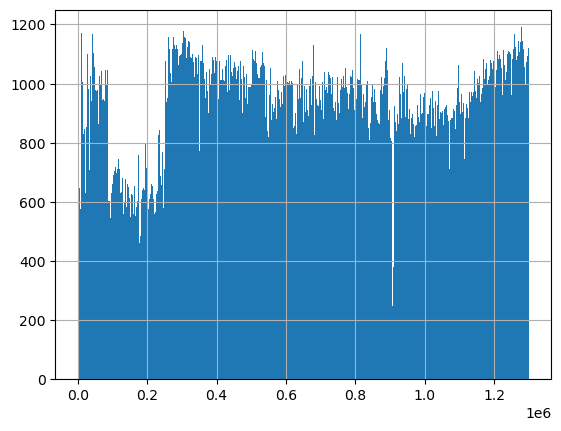

In [6]:
from matplotlib import pyplot as plt
df.id.hist(bins=1000)
plt.show()

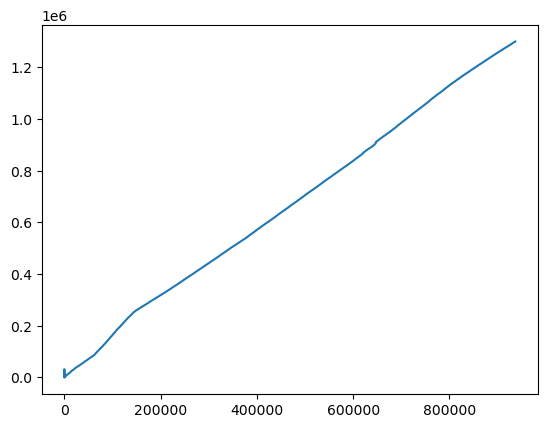

In [7]:
plt.plot(df.index, df.id)
plt.show()

## Extracting data from API

### Normal requests

In [71]:
import requests
api_key  = "7539474c8eb5209f86f4475c17c59c86"
pd.options.display.max_columns = 30
movie_id=df.sample(n=10).id.tolist()
movies=[]
for movie in movie_id:
    movie_api = "https://api.themoviedb.org/3/movie/{}?api_key="
    url = movie_api.format(movie) + api_key
    r = requests.get(url)
    data_raw = r.json()
    movies.append(data_raw)
data=pd.DataFrame(movies)

### Multithreading requests

In [24]:
import asyncio
import time 
import aiohttp
from aiohttp.client import ClientSession
import nest_asyncio
nest_asyncio.apply() #This is only needed for jupyter notebooks
false=False
null=None
true=True

async def download_link(url:str,session:ClientSession):
    async with session.get(url) as response:
        result = await response.text()
        return result

async def download_all(urls:list):
    my_conn = aiohttp.TCPConnector(limit=10)
    async with aiohttp.ClientSession(connector=my_conn) as session:
        tasks = []
        for url in urls:
            task = asyncio.ensure_future(download_link(url=url,session=session))
            tasks.append(task)
        await asyncio.gather(*tasks,return_exceptions=True) # the await must be nest inside of the session
        dataa=[eval(task.result()) for task in tasks]
    return dataa
        
movie_id=df.sample(n=1000).id.tolist()
movies_urls=[]
for movie in movie_id:
    movie_api = "https://api.themoviedb.org/3/movie/{}?api_key="
    url = movie_api.format(movie) + api_key
    movies_urls.append(url)
        
url_list = movies_urls
start = time.time()
data=asyncio.run(download_all(url_list))
end = time.time()
print(f'download {len(url_list)} links in {end - start} seconds')

download 1000 links in 28.75652837753296 seconds


In [25]:
data_df=pd.DataFrame(data)
data_df['release_date']=pd.to_datetime(data_df.release_date)

In [26]:
data_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/Gf9j5iQJOwOpA4r7gYhwpZbyPa.jpg,None,0,"[{'id': 37, 'name': 'Western'}]",,381998,tt0046905,[US],en,The Desperado,"""Only a fool sticks his neck out for somebody ...",6.607,/5Wg9vbmCplBY5gUo6JzacQN3L7I.jpg,"[{'id': 36986, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-06-20,0,80,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Sam Garrett was all bad...all killer...and alw...,The Desperado,False,6.6,5
1,False,None,None,0,[],,443337,tt5889926,[US],en,Power to Order,'Power to Order' follows the production of a s...,0.014,None,[],[],1941-02-23,0,10,[],Released,,Power to Order,False,0.0,0
2,False,None,None,0,"[{'id': 10402, 'name': 'Music'}]",,283898,,[US],en,Metallica: Glastonbury Festival,Metallica performs on the Pyramid stage at the...,0.377,/21HHfNLEejGlUyi5EIGYsuVUzN9.jpg,[],[],2014-06-28,0,96,[],Released,Live on the Pyramid stage,Metallica: Glastonbury Festival,True,0.0,0
3,False,/3nVeYP3a7KhrJXtd3uPydLcm8zr.jpg,None,0,"[{'id': 28, 'name': 'Action'}]",,72883,tt0372879,[US],en,ECW Double Tables,Public Enemy defend their ECW Tag Team Titles ...,1.732,/s8xgbtZO2lCCSw7ABkR60YPCa1.jpg,"[{'id': 17137, 'logo_path': '/17Oe2J3GBV0rqsIe...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-04,0,112,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,ECW Double Tables,False,0.0,0
4,False,/4Bu8EzdZFptcB0544GIx6S8bvIK.jpg,None,0,"[{'id': 35, 'name': 'Comedy'}]",,943794,tt0237704,[IT],it,Le sciamane,Claudia is your typical thirtysomething urban ...,4.420,/oIPi97BXoDz9UCttLcRfA6peZvd.jpg,"[{'id': 170644, 'logo_path': None, 'name': 'Fr...","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",2000-09-15,0,97,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,,Le sciamane,False,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,None,None,0,[],,837649,tt0437613,[US],en,With Will Rogers in Dublin,"In this silent short film, the first in a seri...",0.172,None,"[{'id': 14032, 'logo_path': None, 'name': 'Pat...","[{'iso_3166_1': 'US', 'name': 'United States o...",1927-03-06,0,10,[],Released,,With Will Rogers in Dublin,False,0.0,0
996,False,None,None,0,[],,527150,None,[FR],fr,Là est la maison,"From the outside we can not see anything, insi...",0.010,None,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",2018-06-11,0,13,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,Here Is The House,False,0.0,0
997,False,/xCADGdngYvcqiGLoY2ImDFBQ93P.jpg,None,0,"[{'id': 27, 'name': 'Horror'}]",,693475,tt11242576,[US],en,The Jester: Chapter 3,"On Halloween night, a young girl has no one to...",6.426,/A3Wvfvw2HSaFA301Dvdta6tAMao.jpg,"[{'id': 143697, 'logo_path': None, 'name': 'Ma...",[],2019-10-31,0,14,[],Released,,The Jester: Chapter 3,False,7.5,55
998,False,None,None,0,"[{'id': 99, 'name': 'Documentary'}]",,561382,None,[US],en,BLKNWS,A conceptual and collaborative approach to con...,1.798,/xgSBUawba1JCudEVZ4N9TlakNi4.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-10-10,0,30,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,BLKNWS,False,0.0,0


### Year of release vs Movie Id

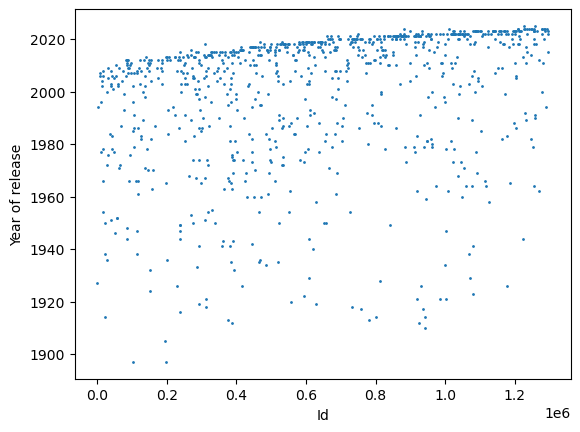

In [11]:
plt.scatter(data_df.id, data_df.release_date.dt.year, s=1)
plt.xlabel('Id')
plt.ylabel('Year of release')
plt.show()

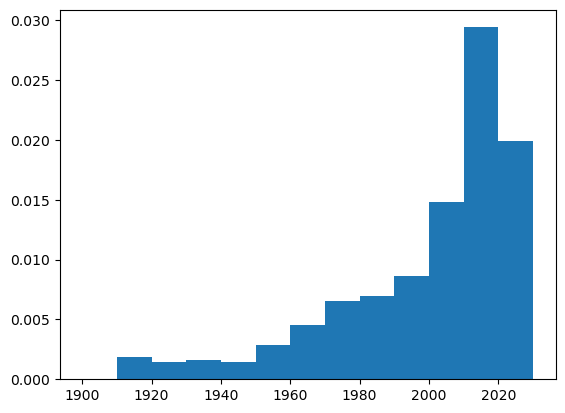

In [27]:
plt.hist(data_df.release_date.dt.year, bins=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030], density=True)
plt.show()

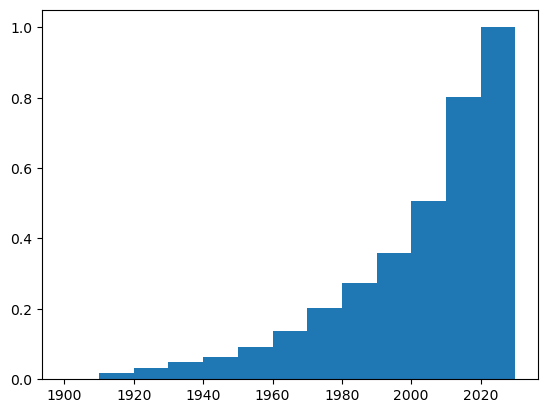

In [28]:
plt.hist(data_df.release_date.dt.year, bins=[1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030], density=True, cumulative=True)
plt.show()